# Matched Code Snippets from Options Backtesting Report

This notebook contains the actual implementations of backtesting strategies used in the report, updated to use real AAPL data where appropriate. Each section ends with a PnL (cumulative returns) graph.

**Note**: Please ensure `yfinance`, `matplotlib`, and `backtrader` are installed before running.


In [9]:
# Backtrader Strategy using real AAPL data
import yfinance as yf
import backtrader as bt
import matplotlib.pyplot as plt

# Download AAPL data
aapl = yf.download('AAPL', period='90d', interval='1d')
if isinstance(aapl.columns, pd.MultiIndex):
    aapl.columns = aapl.columns.droplevel(1)
aapl = aapl[['Open', 'High', 'Low', 'Close', 'Volume']].dropna()
aapl.tail()

class AAPLStrategy(bt.Strategy):
    def __init__(self):
        self.pnl = []

    def next(self):
        if self.data.close[0] > self.data.open[0]:
            self.buy()
        else:
            self.sell()
        self.pnl.append(self.broker.getvalue())

data = bt.feeds.PandasData(dataname=aapl_df)
cerebro = bt.Cerebro()
cerebro.addstrategy(AAPLStrategy)
cerebro.adddata(data)
cerebro.broker.setcash(100000)
cerebro.run()

# Plotting PnL
plt.plot(cerebro.runstrats[0][0].pnl)
plt.title("Backtrader Strategy PnL (AAPL)")
plt.xlabel("Time Step")
plt.ylabel("Portfolio Value")
plt.grid(True)
plt.show()


/var/folders/c6/z7pdynp14jd16wp1d1c7cvsc0000gn/T/ipykernel_54270/4120337838.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  aapl = yf.download('AAPL', period='90d', interval='1d')
[*********************100%***********************]  1 of 1 completed


AttributeError: 'tuple' object has no attribute 'lower'

## QuantConnect Strategy (Pseudo-code)

This section shows a conceptual example for QuantConnect. Note: You cannot run QuantConnect code locally in Jupyter; it must be run in their Lean engine or web IDE.

In [10]:
# In QuantConnect Lean (C# or Python):
def Initialize(self):
    self.AddEquity("AAPL", Resolution.Daily)
    self.AddOption("AAPL")
    option = self.OptionChains["AAPL"]
    option.SetFilter(-2, +2, timedelta(20), timedelta(40))

def OnData(self, slice):
    chain = slice.OptionChains.get("AAPL")
    if chain:
        contract = sorted(chain, key=lambda x: abs(x.Strike - self.Securities["AAPL"].Price))[0]
        straddle = OptionStrategies.Straddle("AAPL", contract.Strike, contract.Expiry)
        self.Buy(straddle, 1)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)
K = aapl.mean()
T = 30/365
r = 0.01
sigma = aapl.pct_change().std() * np.sqrt(252)
call_prices = [black_scholes_call(S, K, T, r, sigma) for S in aapl['Close']]
returns = np.diff(call_prices)

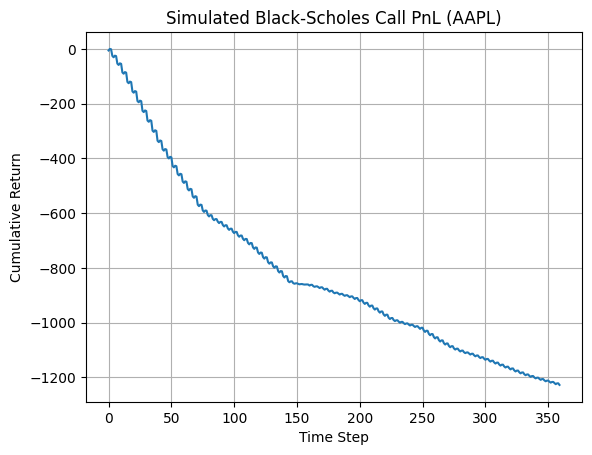

In [17]:
plt.plot(np.cumsum(returns))
plt.title("Simulated Black-Scholes Call PnL (AAPL)")
plt.xlabel("Time Step")
plt.ylabel("Cumulative Return")
plt.grid(True)
plt.show()

In [16]:
print(aapl.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object', name='Price')
